# Applying MLPs to Fashion-MNIST dataset

In this tutorial, we will work on creating a multi-layer perceptron to classify 10 categories of clothing from the fashion MNIST dataset using Tensorflow and Keras.

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten

## Step 1: Load and explore the dataset
First step is to load the MNIST dataset. Keras has functions to directly download some famous __[datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)__. The first time you run this command, it will install the dataset. 

The dataset contains 70,000 samples of clothing articles. Each sample is a single channel (i.e. grayscale) 28x28 (pixels) image of a particular category of clothing.

We have 10 classes, for the digits from 0 to 9. More information on the dataset can be found in __[Kaggle Fashion-MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist)__

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# explore the dataset
print('Training set shape: {}'.format(x_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test set shape: {}'.format(x_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

4422102/4422102 [==============================] - 33s 8us/step
Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


As we can see, the training set has 60k images while the test set has 10k.

Let us have a closer look at the dataset before we start working with it. It is always a good practice to check the size, the range of values for the input and output, and visualize a few samples.

It is also a good idea to check the format of the labels. They may be given as integers of on-hot encoded vectors.

Sample labels are: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
The classes are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
The values in the input data range from 0 to 255


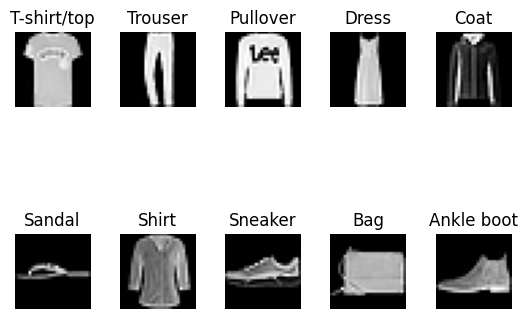

In [3]:
labels = set(y_train)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('Sample labels are: {}'.format(y_train[:20]))
print('The classes are: {}'.format(labels))
print('The values in the input data range from {} to {}'.format(x_train.min(),x_train.max()))

# Visualize a sample from each class
i = 0
for label in labels:
    imgs = x_test[y_test==label]
    img = imgs[0]
    
    # plot
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.4)
    i+=1


We have 10 classes just like those in the original MNIST dataset. The values of the input range from 0-255.

In this example, we will normalize using min-max normalization which will set all our values to have a minimum of 0 and a maximum of one.

$x_{i}' = \frac{x_{i}-min(x)}{max(x)-min(x)}$

Where x is the feature (column). We already know that the minimum value is 0 and the maximum is 255 for all features, so we'll directly apply that in our equation. 

An alternative would be to use __[MinMax scaler from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale)__.

In [4]:
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255
print('The values in the input data range from {} to {}'.format(x_train.min(),x_train.max()))

The values in the input data range from 0.0 to 1.0


We will be using softmax as the activation function in the last layer, which outputs our labels one-hot encoded. Generally, we should convert our input labels to the same format. 

Although tf and keras do that automatically and this is not required in this example, we will go ahead with it to conform to the general case. 

In [5]:
# make sure that the labels are still integers (this cell has not been run before)
if len(y_train.shape)==1:
    y_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_test = keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape, y_test.shape)
print(y_train[0:3])
print('Old labels: {}'.format(np.argmax(y_train[:3], axis=1)))

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Old labels: [9 0 0]


## Step 2: Defining the MLP Model
Now that we have loaded, explored, and preprocessed the dataset, we are ready to create the MLP that we will train to classify the dataset.

We will use Keras Sequential API within tensorflow. The first layer should 'Flatten' the input to be one column of (28x28) 784 values. Then we expect the first Dense layer to allow for an input of size 784. 

For the output layer, we need to define the number of units and the type of activation function. Since we will be using a softmax activation function, then we need 10 units in the output layer.

Create your own network by defining:
1. Number hidden layers
2. Number of neurons in each hidden layer
3. Activation function in each layer

In [6]:
# Please define your model here

We now have the network all set. 

We need to define the optimization process:
* What is the loss function that we will try to minimize
* What optimizer do we want to use
* Metrics we would like to monitor during training (these do not affect the optimization)

**What options do we have for the optimizer, loss function, and metrics?**:
* __[Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)__
* __[Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)__
* __[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)__

To add these parameters, we will compile the model and pass them to the model.

In [ ]:
# choose your optimization parameters and compile the model

: 

## Step 3: Training the Model
We can now begin our training.

Use the whole training set and take 25% of it as a validation set to monitor the performance.

Fit and test your performance and report them

In [ ]:
h = mlp.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.25, verbose=0)

: 

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))
print('Test accuracy: %.2f %%'%(100*mlp.evaluate(x_test,y_test, verbose=0)[1]))

: 

Test it on some samples from the test set and visualize the output

In [ ]:
# pick 10 random images to classify
inds = random.sample([i for i in range(len(y_test))],10)

# predict the classes for each of the picked images
y_out = mlp.predict_classes(x_test[inds])

i = 0
for ind in inds:
    # plot each picture along with its True Label (TL) and Predicted Label (PL)
    img = x_test[ind]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('TL: %.f \nPL: %.f' %(class_names[y_test[ind]],class_names[y_out[i]]))
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.8)
    i+=1

: 